In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

# Ridge Regresyon 
gerekli kütüphaeleri yükledik 


Veri seti işlemleri 

In [2]:
df = pd.read_csv("C:/Users/Mehmet Nur Kavan/Desktop/advertising/Hitters.csv")
df = df.dropna()# eksik verileri siliyoruz
dms = pd.get_dummies(df[['League' ,'Division' , 'NewLeague']]) # kategork değişkenleri dami değişkenlere dönüştürdük 
Y = df["Salary"]
X_ = df.drop(['Salary','League' ,'Division' , 'NewLeague'] , axis = 1).astype('float64')
# damiler ve az önce oluştudugumuz bagımsız değişkenleri birleştirerek X i oluşturduk
X = pd.concat([X_ , dms[['League_N' ,'Division_W' , 'NewLeague_N']]], axis=1)
X_train ,X_test ,y_tarin ,y_test = train_test_split(X,Y,test_size=0.25,random_state= 42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


Amacımız diger paramterelere bakarak Salaryi tahimin edecegiz 

In [4]:
df.shape # satir ve sütün sayısına baktık 

(263, 20)

In [5]:
ridge_model = Ridge(alpha= 0.1).fit(X_train,y_tarin)

In [6]:
ridge_model

Ridge(alpha=0.1)

In [7]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [8]:
ridge_model.intercept_

-4.578626905725628

In [9]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [10]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [11]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_tarin) # her lamada degerine göre moldei fit ediyoruz 
    katsayilar.append(ridge_model.coef_)
   # her lamda degerinde 19 tane katsayı olacak bunu katsayılara ekliyoruz 


In [12]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

Text(0, 0.5, 'Katsayılar')

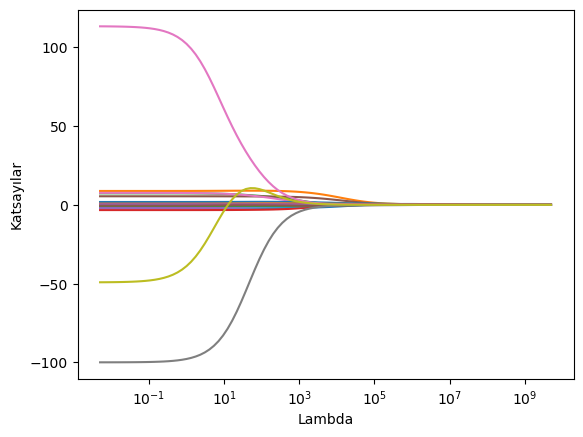

In [13]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")
ax.set_xlabel("Lambda")
ax.set_ylabel("Katsayılar")

bu kısmda farklı lamda degerlerine karşın katsayıların değişimi gösteriliyor 

# TAHMİN

In [14]:
ridge_model = Ridge().fit(X_train,y_tarin)

In [15]:
y_pred = ridge_model.predict(X_train)

In [16]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [17]:
y_tarin[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [19]:
# Train hatası 
RSEM= np.sqrt(mean_squared_error(y_tarin,y_pred))
RSEM # tahimn ettigiiz y ile gerçek y degerlerimiz ile hata kareler otalamsını bulduk

289.34470696006565

In [20]:
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_tarin, cv = 10 , scoring="neg_mean_squared_error")))

351.393158560637

In [21]:
# test hatası 
y_pred = ridge_model.predict(X_test)
RSEM= np.sqrt(mean_squared_error(y_test,y_pred))
RSEM

356.8082905730227

In [23]:
# k katlı çapraz doğrulamyı model tuningde test seti üzerinde uyguluyoru 

In [24]:
ridge_model = Ridge().fit(X_train,y_tarin)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) 

356.8082905730227

In [25]:
lambdalar1 = np.random.randint(0,1000,100)

In [26]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [27]:
ridgecv = RidgeCV(alphas=lambdalar1 , scoring= "neg_mean_squared_error" , cv = 10  )
ridgecv.fit(X_train,y_tarin)

RidgeCV(alphas=array([773, 231, 929, 531, 496, 778, 278, 381, 585, 300, 691, 785,  90,
       459, 111, 174, 115, 360, 439, 558, 617, 107, 996, 199, 185, 891,
       536, 482,  25, 612, 167, 734, 592, 520, 838, 800, 434,  67, 301,
       108, 164, 979, 199, 312, 647, 921, 985, 995, 498, 311, 844, 353,
       351, 773,  37, 772, 786, 958, 848, 829, 714, 717, 357, 522, 958,
       245, 949, 708, 436, 424, 572, 457, 902,  20, 514, 982, 557, 281,
       451, 880,  57, 769, 193, 102, 813, 127, 665, 754, 467, 596, 543,
       144, 458, 126, 334, 958, 896, 114, 914, 716]),
        cv=10, scoring='neg_mean_squared_error')

In [50]:
ridgecv.alpha_  # optimum landayı bulduk 

13

In [51]:
# final modeli 
ridge_tuned = Ridge(alpha=ridgecv.alpha_).fit(X_train,y_tarin)

In [52]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.32583251769995